# Data Visualisation

In this notebook I experiment with different techniques for visualising my data.   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

df_cleaned=pd.read_csv('Walkhighlands_cleaned.csv',index_col=0)
df_train=pd.read_csv('df_train.csv',index_col=0)
df_rating_count=pd.read_csv('df_rating_count',index_col=0)


In [2]:
df_cleaned

,name,info,region,dist,ascent,corbett,munro,grade,bog,rating
0,"Ceannabeinne Township Trail, near Durness",This short walk round the site of an abandoned...,sutherland,1.00,65.0,0.0,0.0,1.0,1.0,3.80
1,"Forsinard Flows and Tower, Forsinard",This short but truly unique walk gives a fasci...,sutherland,1.50,6.0,0.0,0.0,1.0,1.0,3.71
2,Borgie Forest walk,This short forestry walk briefly follows the R...,sutherland,1.75,34.0,0.0,0.0,1.0,1.0,1.43
3,Melvich Beach,This short walk leads out to Melvich Beach - o...,sutherland,1.75,16.0,0.0,0.0,1.0,1.0,4.20
4,Portskerra pier and jetty,This short loop links the pier and the jetty a...,sutherland,2.00,56.0,0.0,0.0,1.0,1.0,4.00
...,...,...,...,...,...,...,...,...,...,...
1538,"Da Kame, Da Sneug & Da Noup: the complete Foula",This magnificent walk takes in the main summit...,shetland,13.00,864.0,0.0,0.0,4.0,2.0,5.00
1539,Fair Isle North Lighthouse & Observatory,"This short, easy ramble follows the road from ...",shetland,6.00,130.0,0.0,0.0,1.0,1.0,3.50
1540,"Ward Hill, Fair Isle",Ward Hill is the highest summit on isolated Fa...,shetland,4.25,204.0,0.0,0.0,2.0,2.0,3.00
1541,"Malcolm's Head and Sheep Rock, Fair Isle",This fantastic walk takes in some of the best ...,shetland,12.75,392.0,0.0,0.0,2.0,2.0,5.00


I found that the histogram setting for pair plot was most effective as there are too many point to clearly represent in a scatter with out it becoming a single mass. 

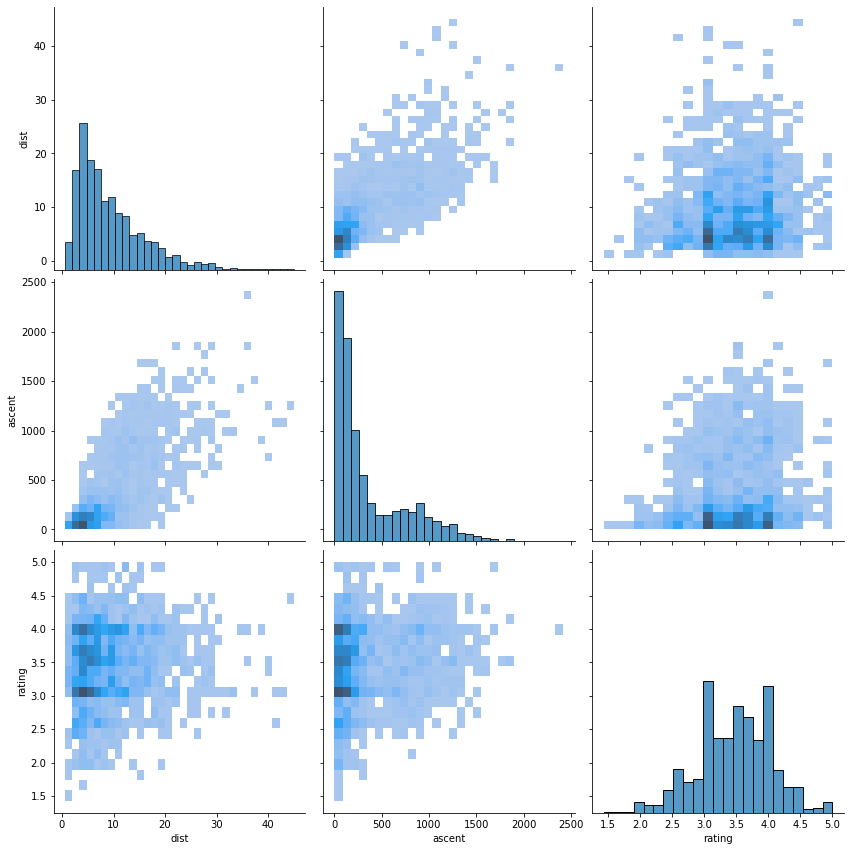

In [3]:
sns.pairplot(df_cleaned[['dist','ascent','rating']],height=4,kind="hist")

Before looking at dimensionality reduction, it is essential to scale data or your clusters will be entirely determined by the scale of each feature.

After scaling, I could run t-SNE with varying perplexity to determine if clusters persisted across the range of values I looked at. I have not inclued the range of values I tried to reduce runtime. 

In [4]:
scaler=StandardScaler()
df_num=df_cleaned[['dist','ascent','corbett','munro','grade','bog']].astype('float')
df_scaled=scaler.fit_transform(df_num)
df_scaled=pd.DataFrame(df_scaled, columns=['dist','ascent','corbett','munro','grade','bog'])

df_embedded=TSNE(n_components=2, learning_rate='auto',init='random', perplexity=50).fit_transform(df_scaled)

Experimenting with colour as a mthod to show how certain features affect t-SNE produced interesting results, here we can see that grade has a very significant effect. 

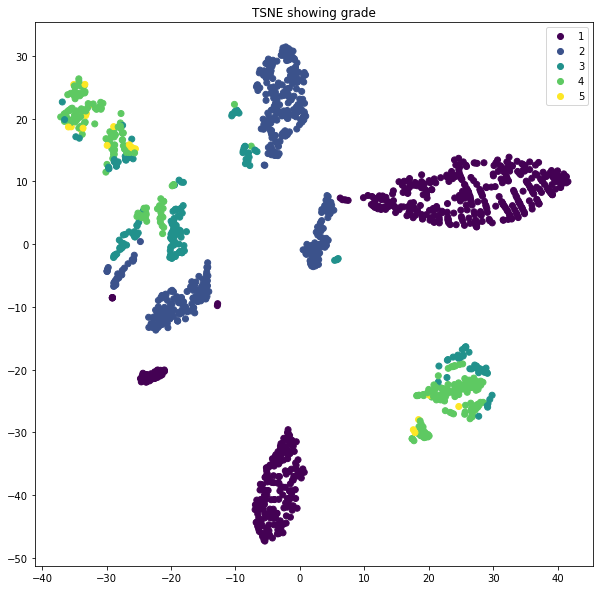

In [5]:
plt.figure(figsize=(10,10))
scatter=plt.scatter(df_embedded[:,0],df_embedded[:,1], c=df_cleaned['grade'])
plt.legend(scatter.legend_elements()[0],['1','2','3','4','5'])
plt.title('TSNE showing grade')
plt.show()

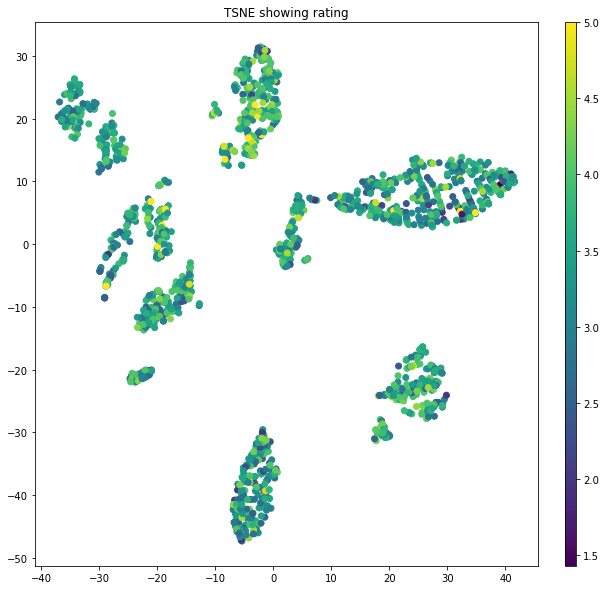

In [6]:
plt.figure(figsize=(10,10))
scatter=plt.scatter(df_embedded[:,0],df_embedded[:,1], c=df_cleaned['rating'])
plt.colorbar(aspect=50,fraction=0.05)
plt.title('TSNE showing rating')
plt.show()

# Bar charts 

The groupby function was very useful when looking to generate values for bar charts

In [7]:
df_grade=df_cleaned.groupby('grade',axis=0).mean()
df_bog=df_cleaned.groupby('bog',axis=0).mean()
df_munro=df_cleaned.groupby('munro',axis=0).mean()
df_corbett=df_cleaned.groupby('corbett',axis=0).mean()

Text(0.5, 0.98, 'Catagorical Features Rating')

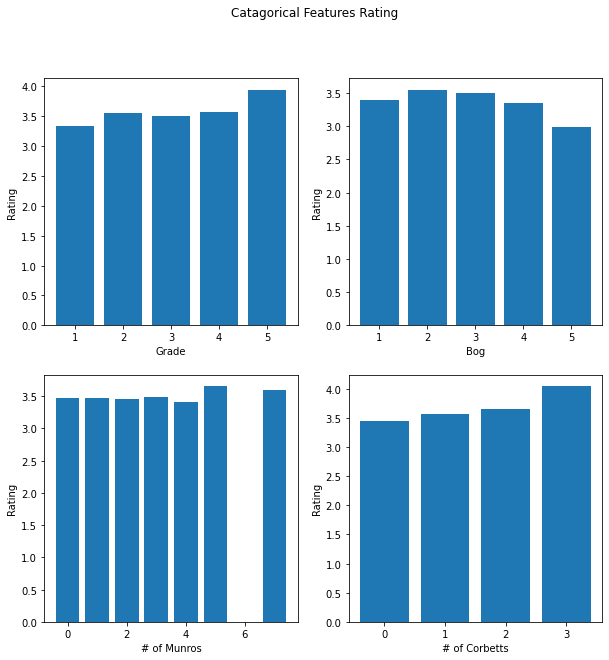

In [8]:
fig, axs =plt.subplots(2,2, figsize=(10,10))
axs[0,0].bar(df_grade.index,df_grade['rating'])
axs[0,0].set_xlabel('Grade')
axs[0,0].set_ylabel('Rating')
axs[0,1].bar(df_bog.index,df_bog['rating'])
axs[0,1].set_xlabel('Bog')
axs[0,1].set_ylabel('Rating')
axs[1,0].bar(df_munro.index,df_munro['rating'])
axs[1,0].set_xlabel('# of Munros')
axs[1,0].set_ylabel('Rating')
axs[1,1].bar(df_corbett.index,df_corbett['rating'])
axs[1,1].set_xlabel('# of Corbetts')
axs[1,1].set_ylabel('Rating')
fig.suptitle('Catagorical Features Rating')

After seeing some trends in these bar charts, I thought it would be interesting to see how many walks are contributing to each bar. As we can see, some values are far more common than others.  

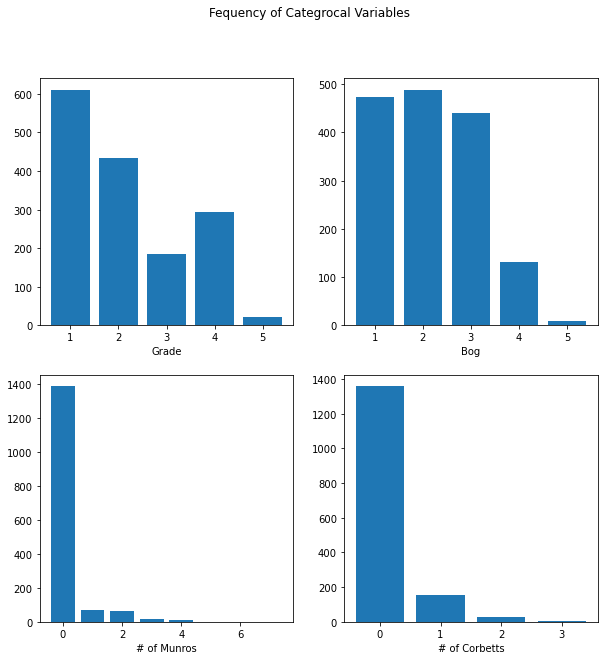

160 187


In [9]:
grade_count=df_cleaned['grade'].value_counts().sort_index(ascending=True)
bog_count=df_cleaned['bog'].value_counts().sort_index(ascending=True)
munro_count=df_cleaned['munro'].value_counts().sort_index(ascending=True)
corbett_count=df_cleaned['corbett'].value_counts().sort_index(ascending=True)

fig, axs =plt.subplots(2,2, figsize=(10,10))
axs[0,0].bar(grade_count.index,grade_count.values)
axs[0,0].set_xlabel('Grade')
axs[0,1].bar(bog_count.index,bog_count.values)
axs[0,1].set_xlabel('Bog')
axs[1,0].bar(munro_count.index,munro_count.values)
axs[1,0].set_xlabel('# of Munros')
axs[1,1].bar(corbett_count.index,corbett_count.values)
axs[1,1].set_xlabel('# of Corbetts')
fig.suptitle('Fequency of Categrocal Variables')
plt.show()

print(1543-munro_count[0],1543-corbett_count[0])

# Regions

In [11]:
df_region=df_cleaned.groupby('region').mean()
df_region.sort_values(by='rating', inplace=True)

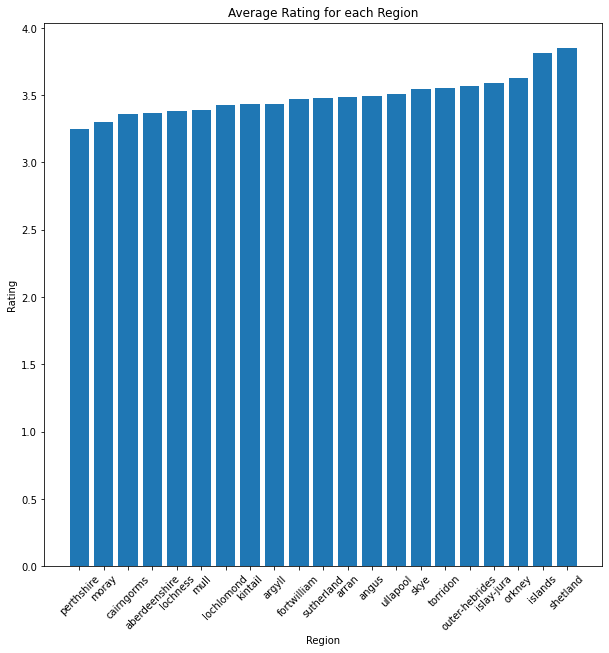

In [12]:
plt.figure(figsize=(10,10))
plt.bar(df_region.index, df_region['rating'])
plt.xlabel('Region')
plt.ylabel('Rating')
plt.title('Average Rating for each Region')
plt.xticks(rotation = 45)
plt.show()

# Ratings 

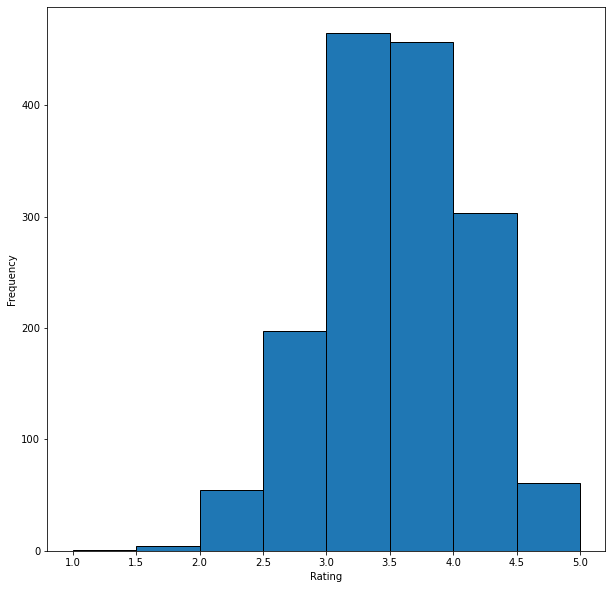

In [26]:
plt.figure(figsize=(10,10))
plt.hist(df_cleaned['rating'],edgecolor='black',bins=[0.5*n for n in range(2,11)])
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

After looking at how ratings are distributed, it seems interesting to investigate which featues are most associated with high or low ratings. Here is my ideas at how to do this 

In [14]:
word_dict={}
for word in df_train.columns:
    new_df=df_train[df_train[word]==1]
    word_dict[word]=new_df['rating'].mean()
df_score=pd.Series(word_dict).dropna()

In [15]:
df_score.sort_values(inplace=True)
print(df_score.to_string())

forestry                 3.115441
pleasant                 3.141406
track                    3.251552
region_perthshire        3.258333
visit                    3.263297
easy                     3.281781
waymarked                3.285957
area                     3.298929
forest                   3.301471
good                     3.319396
dist                     3.320000
woodland                 3.322871
river                    3.325806
via                      3.330556
region_cairngorms        3.334018
grade_original           3.339761
old                      3.345068
region_moray             3.347027
glen                     3.356667
moorland                 3.362069
region_kintail           3.370667
region_aberdeenshire     3.370984
circular                 3.375370
section                  3.376190
region_mull              3.378293
approach                 3.383158
follows                  3.392800
region_lochness          3.395098
climb                    3.396780
bog_original  

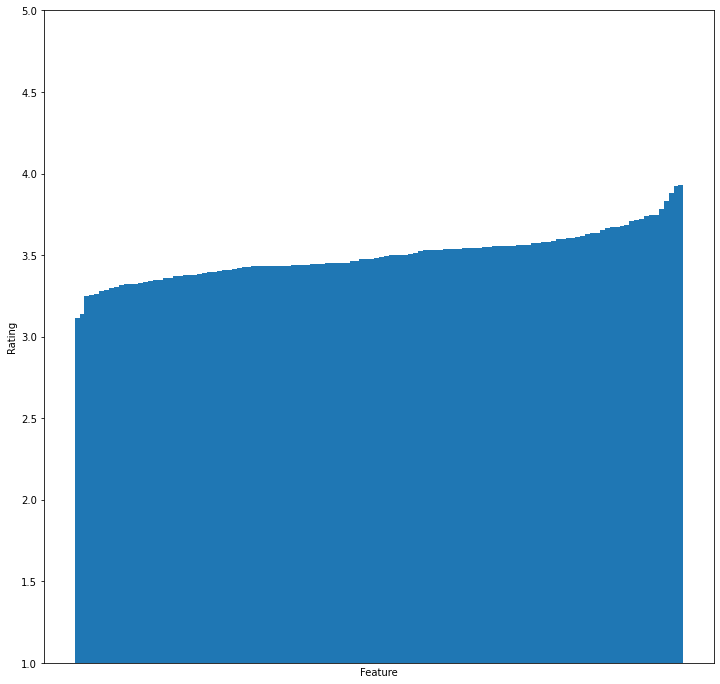

In [16]:
plt.figure(figsize=(12,12))
plt.bar(df_score.index,df_score.values,width=1)
plt.xlabel('Feature')
plt.ylabel('Rating')
plt.tick_params(axis='both', bottom=False, labelbottom=False)
plt.grid(False)
plt.ylim([1,5])
plt.show()


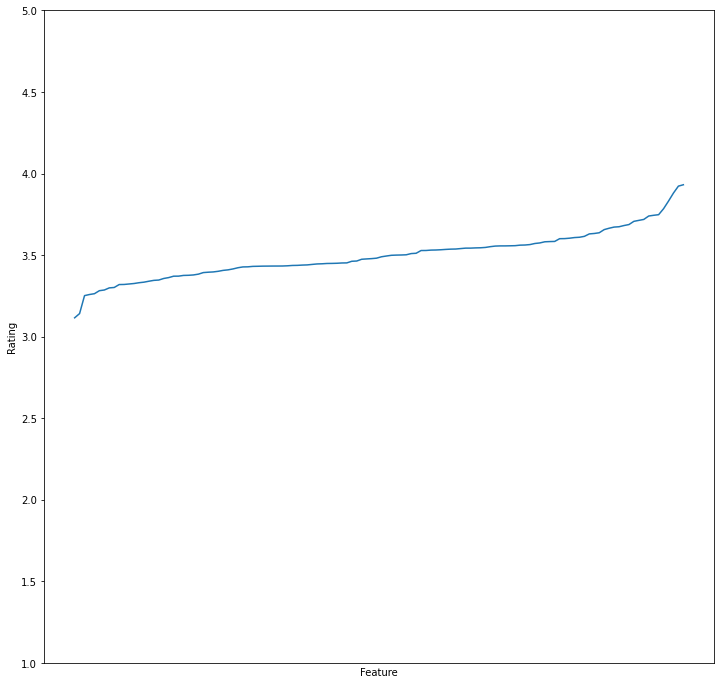

In [18]:
plt.figure(figsize=(12,12))
plt.plot(df_score.index,df_score.values)
plt.xlabel('Feature')
plt.ylabel('Rating')
plt.tick_params(axis='both', bottom=False, labelbottom=False)
plt.grid(False)
plt.ylim([1,5])
plt.show()

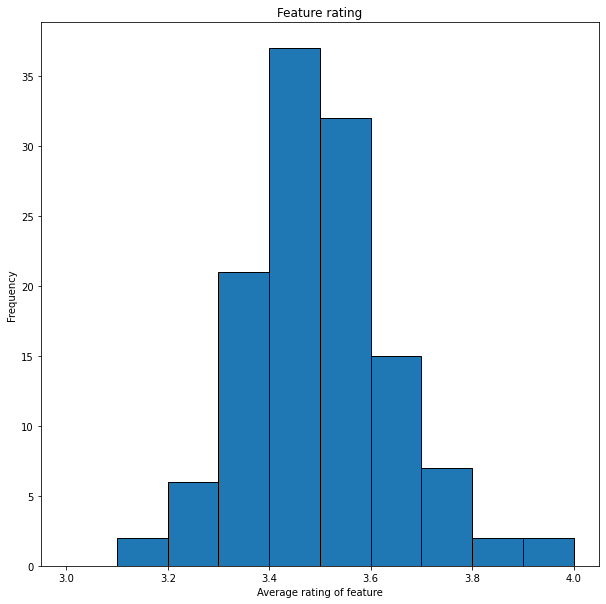

In [19]:
plt.figure(figsize=(10,10))
plt.hist(df_score.values,edgecolor='black',bins=[0.1*n for n in range(30,41)])
plt.xlabel('Average rating of feature')
plt.ylabel('Frequency')
plt.title('Feature rating')
plt.show()

# TSNE with all the features.

In [20]:
df_train.columns

Index(['dist', 'ascent_original', 'corbett_original', 'munro_original',
       'grade_original', 'bog_original', 'rating', 'region_aberdeenshire',
       'region_angus', 'region_argyll',
       ...
       'visits', 'climb', 'beautiful', 'viewpoint', 'circuit', 'across',
       'hill', 'beach', 'enjoyable', 'heads'],
      dtype='object', length=126)

In [21]:
scaler=MinMaxScaler()
Train_scaled=scaler.fit_transform(df_train)
Train_scaled=pd.DataFrame(Train_scaled)

Train_embedded=TSNE(n_components=2, learning_rate='auto',init='random', perplexity=200).fit_transform(Train_scaled)

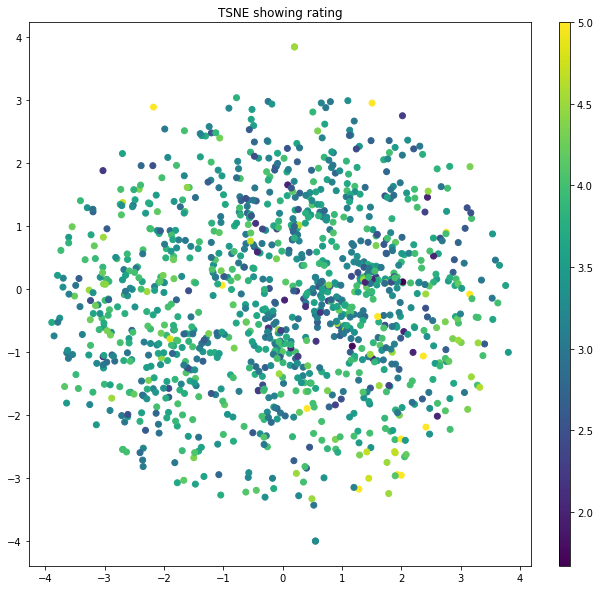

In [22]:
plt.figure(figsize=(10,10))
scatter=plt.scatter(Train_embedded[:,0],Train_embedded[:,1], c=df_train['rating'])
plt.colorbar(aspect=50,fraction=0.05)
plt.title('TSNE showing rating')
plt.show()

# Selecting feature more carefully

In [23]:
df_rating_count

,rating,count
dist,3.472748,1157
ascent_original,3.472748,1157
corbett_original,3.548321,137
munro_original,3.495169,118
grade_original,3.472748,1157
...,...,...
across,3.500000,88
hill,3.547000,110
beach,3.671818,77
enjoyable,3.433137,51


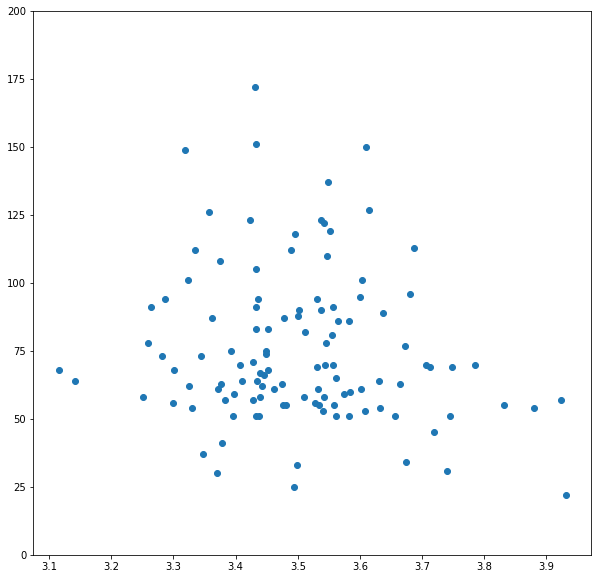

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df_rating_count['rating'],df_rating_count['count'])
ax.set_ylim(0,200)
plt.show()